# Predication of bike rental count daily based on the environmental and seasonal settings.

##### This project is divided into 5 sections:

##### 1.Introduction
##### 2.Exploring The Data
##### 3.Exploratory Data Analysis
	3.1 Describing Features
	3.2 Descriptive Figures
		3.2.1 Distribution Plots
		3.2.2 Boxplots
		3.2.3 Cross-Correlation Plot
		3.2.4 Distribution Plot With Respect To The Target Feature
		3.2.5 Pair Plots With Respect To Our Target Feature
	3.3 Skewed Features
		3.3.1 Skewed Features: Log Transform
		3.3.2 Removing Some Features
		3.3.3 Normalization Of Numerical Features
        3.3.4 Processing Categorical Feature: One Hot- Encoding
##### 4.Model Selection
	4.1 Gradient descent for parameter estimation
  	4.2 Data Preparation: Training And Testing Datasets
	4.3 Validating results
	4.4 Fitting other models
##### 5.Actionable Recommendations


In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
%matplotlib inline


#my_details 
__author__ = "sreetam dev"
__email__  = "sreetamkumardev@gmail.com"

# ---- 2.Exploring the data  ----
###### There is one dataset associoated with our task. The strategy is to perform explanatory data analysis before separating into training and test sets before performing machine learning.

In [2]:
#loading the data
df_bike_sharing_day = pd.read_csv("day.csv")
df_bike_sharing_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_bike_sharing_day.info() # fetching data types and length of data entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df_bike_sharing_day.isnull().any() # searching if there are any null values that require imputation.

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [5]:
# examining for duplicate instances within our dataset
print("The total no of duplicate records within our dataset are:", df_bike_sharing_day.duplicated().sum())

The total no of duplicate records within our dataset are: 0


# ---- 3.Exploratory data analysis ----

#### 3.1 Describing Features

In [6]:
df_bike_sharing_day.describe(include = [np.number]) # descriptive statistics for numerical features

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df_bike_sharing_day.describe(include = 'O') # descriptive features for categorical features

,dteday
count,731
unique,731
top,2011-12-17
freq,1


In [8]:
# converting into datetime format so that late we can work with "dteday" feature
df_bike_sharing_day["dteday"] = pd.to_datetime(df_bike_sharing_day["dteday"])

#### 3.2 Descriptive Figures

#### 3.2.1 Distribution Plots/Boxplots -  visualising numerical features

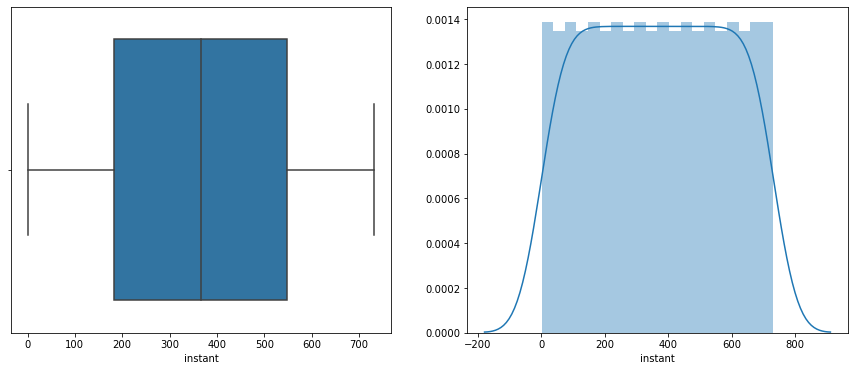

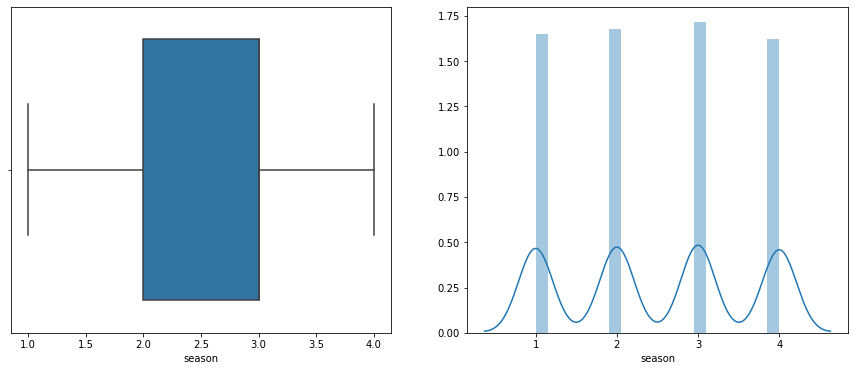

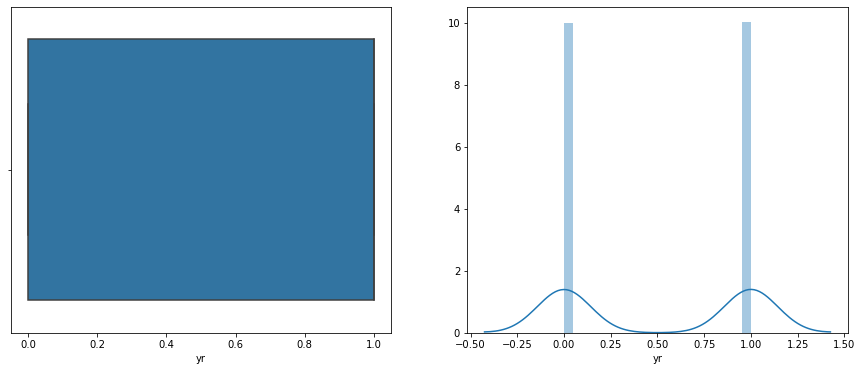

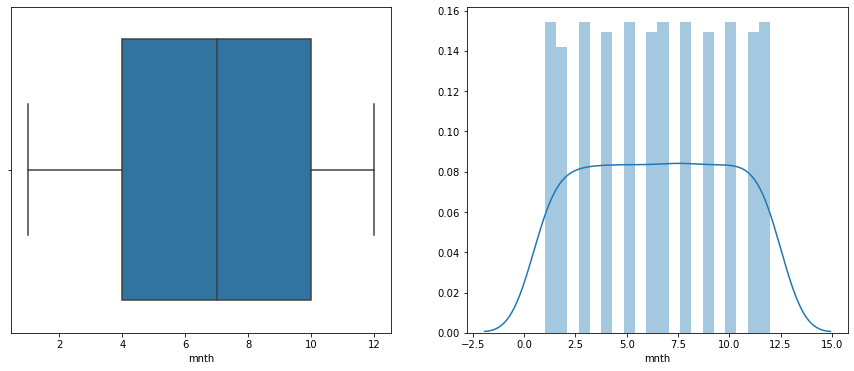

/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


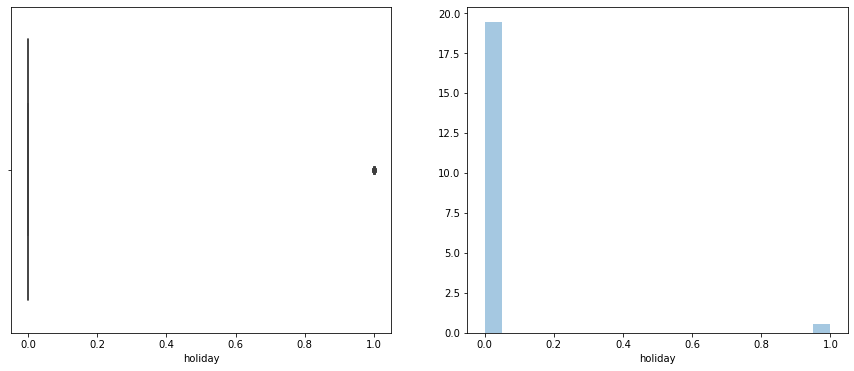

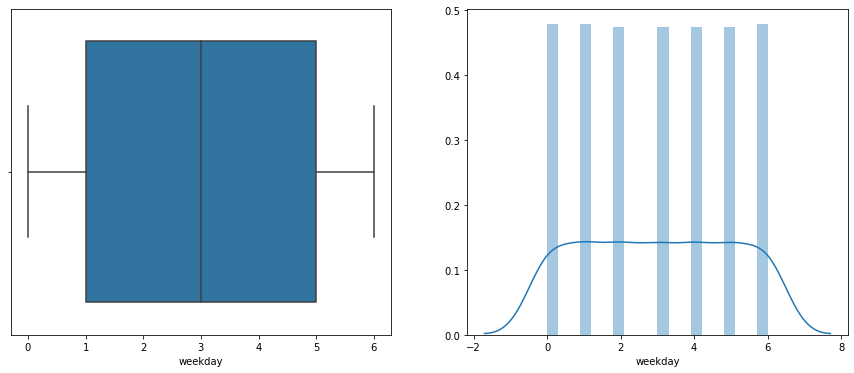

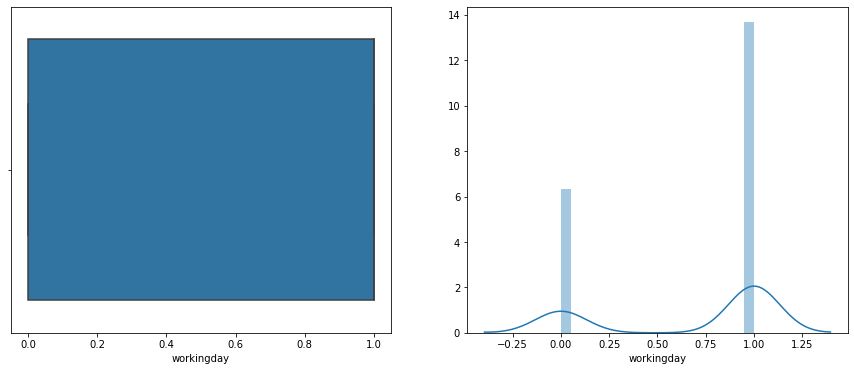

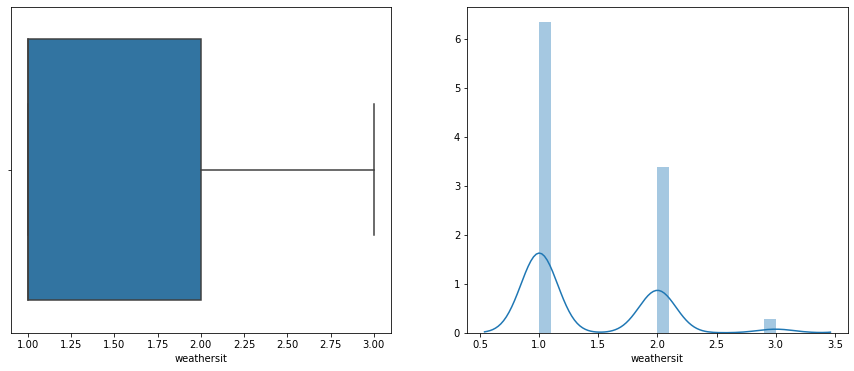

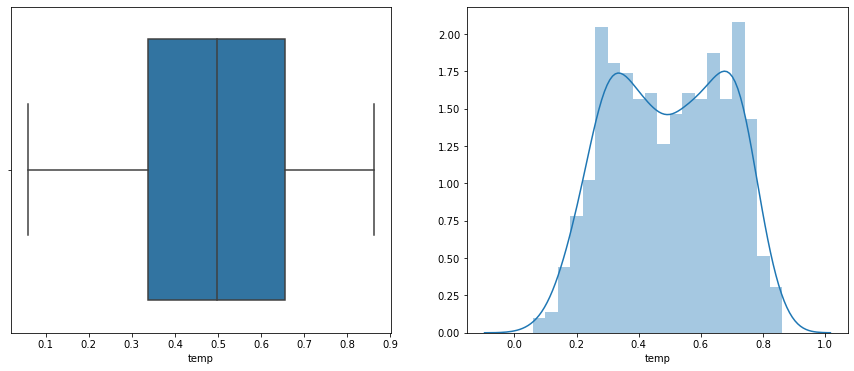

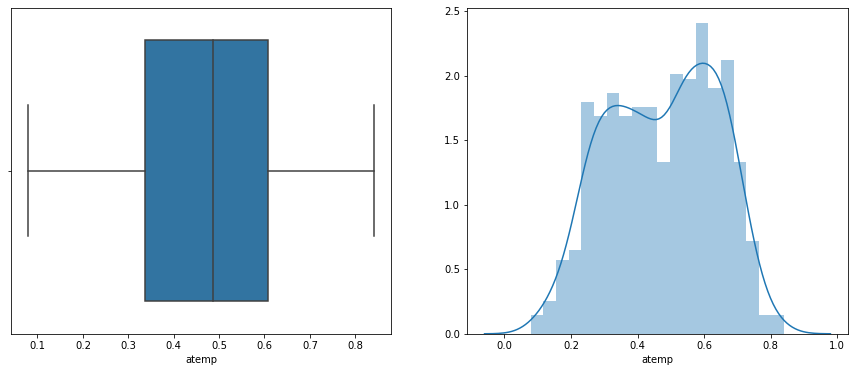

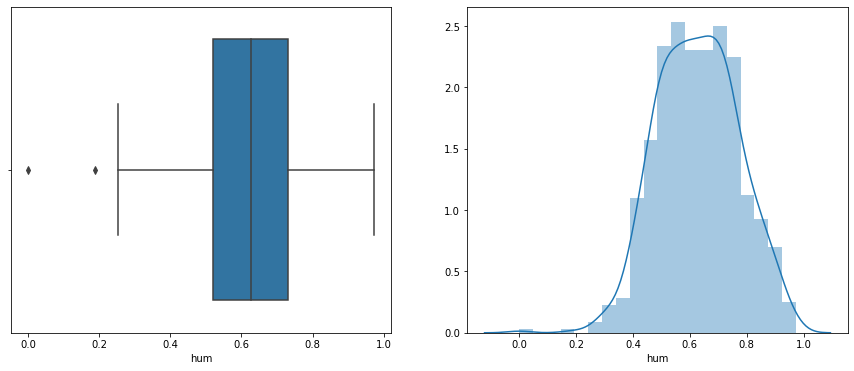

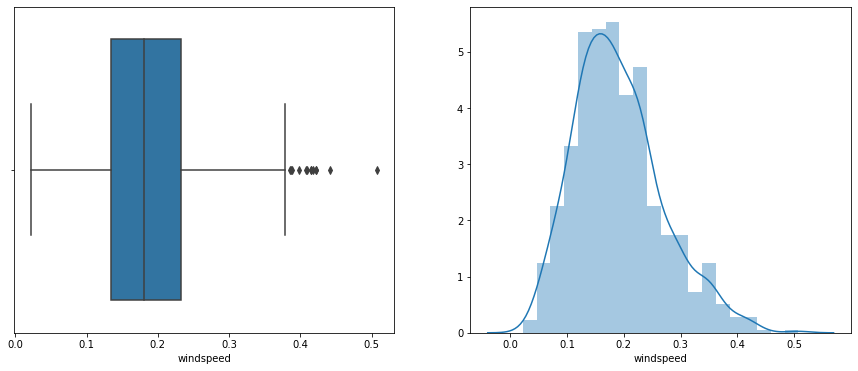

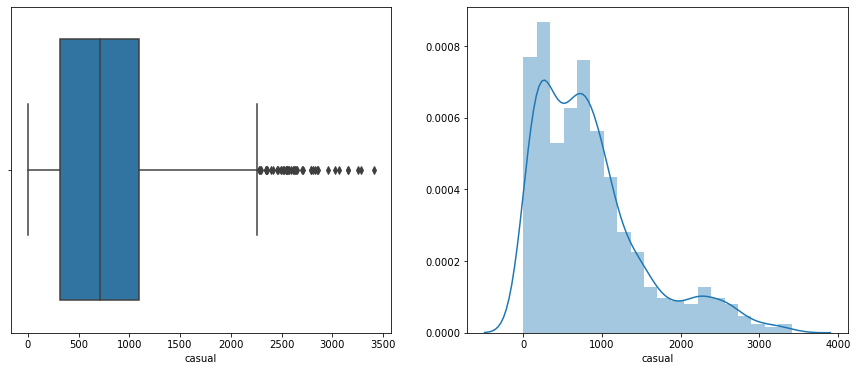

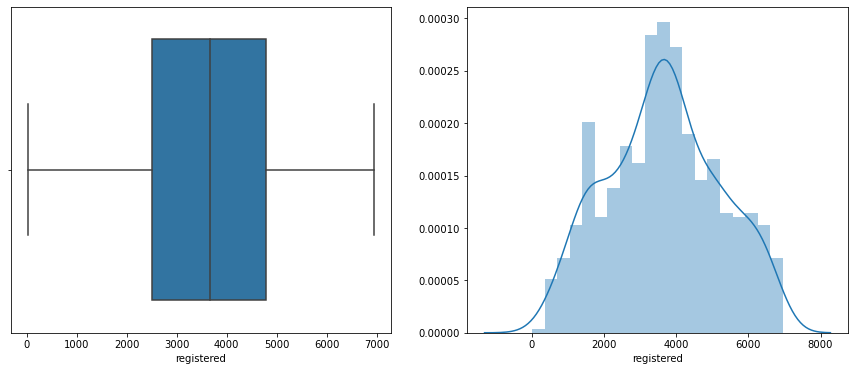

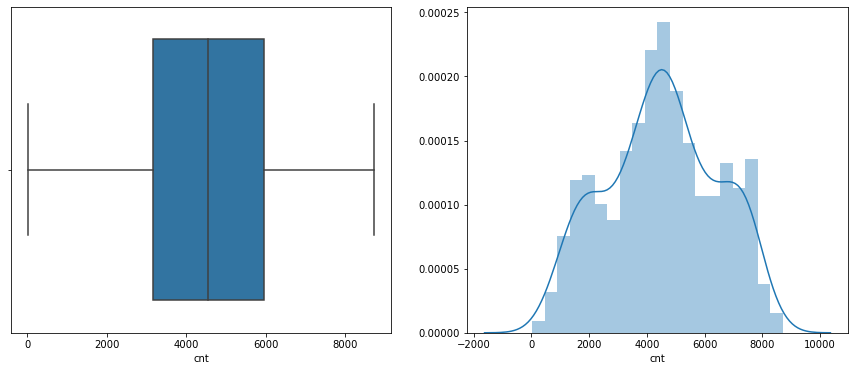

In [9]:
# examining potential outlier 
df_bike_sharing_day_nr_features = ["instant","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]

for feature in df_bike_sharing_day_nr_features:
    y = df_bike_sharing_day[feature]
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.boxplot(y)
    plt.subplot(1,2,2)
    sns.distplot(y, bins =20)
    plt.show()

In [10]:
df_bike_sharing_day_nr_features = ["instant","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]

for feature in df_bike_sharing_day_nr_features:
    stat_feature = df_bike_sharing_day[feature].describe()
#     print(stat_feature)
    IQR   = stat_feature['75%'] - stat_feature['25%']
    upper = stat_feature['75%'] + 1.5 * IQR
    lower = stat_feature['25%'] - 1.5 * IQR
    print('For the feature {} the upper boundary is {} and lower boundary is {}'.format(feature,upper, lower))

For the feature instant the upper boundary is 1096.0 and lower boundary is -364.0
For the feature season the upper boundary is 4.5 and lower boundary is 0.5
For the feature yr the upper boundary is 2.5 and lower boundary is -1.5
For the feature mnth the upper boundary is 19.0 and lower boundary is -5.0
For the feature holiday the upper boundary is 0.0 and lower boundary is 0.0
For the feature weekday the upper boundary is 11.0 and lower boundary is -5.0
For the feature workingday the upper boundary is 2.5 and lower boundary is -1.5
For the feature weathersit the upper boundary is 3.5 and lower boundary is -0.5
For the feature temp the upper boundary is 1.1329160000000003 and lower boundary is -0.14041600000000015
For the feature atemp the upper boundary is 1.0147412500000002 and lower boundary is -0.06829675000000018
For the feature hum the upper boundary is 1.0455212500000002 and lower boundary is 0.20468725
For the feature windspeed the upper boundary is 0.38061125 and lower boundary

#### 3.2.2 Examining potential outlier

In [11]:
df_bike_sharing_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
df_bike_sharing_day[df_bike_sharing_day.holiday > 0.8]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
104,105,2011-04-15,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
149,150,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
247,248,2011-09-05,3,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236,2115,3351
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
314,315,2011-11-11,4,0,11,1,5,0,1,0.324167,0.306817,0.446250,0.314675,440,2928,3368
327,328,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495
359,360,2011-12-26,1,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430,887,1317


In [13]:
len(df_bike_sharing_day[df_bike_sharing_day.holiday == 1])

21

In [14]:
df_bike_sharing_day[df_bike_sharing_day.hum < 0.2]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


In [15]:
df_bike_sharing_day[df_bike_sharing_day.windspeed > 0.38]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569


In [16]:
df_bike_sharing_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### NOTE:
###### Observing the distribution graphs and IQR ranges, we observe that humditity contains two instances which adds left skewness to the distribution. Additionally observing the IQR ranges for windspeed and disribution we can see that there are two instances which add skewness to the distribution. And it is also supported with the statistical desctiption to lie after four standard deviations from the mean.So we decide to drop those instances.

In [17]:
# removing humidity outliers which were causing skewness

df_bike_sharing_day=(df_bike_sharing_day[df_bike_sharing_day.hum > 0.2])

In [18]:
# removing windspeed outliers which were causing skewness

df_bike_sharing_day= (df_bike_sharing_day[df_bike_sharing_day.windspeed < 0.41])

#### 3.2.3 Boxplots/Cross-Correlation Plot with respect to our target related feature.

In [19]:
df_bike_sharing_day_nr_features = ["instant","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt"]

def boxplots_features_target(size, target, features, data):
    plt.figure(figsize = size)
    for each in range(len(df_bike_sharing_day_nr_features)-1):
        plt.subplot(5,3, each+1)
        sns.boxplot(x = target, y = features[each], data = data)

def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize = (10,6))
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    print(corr)



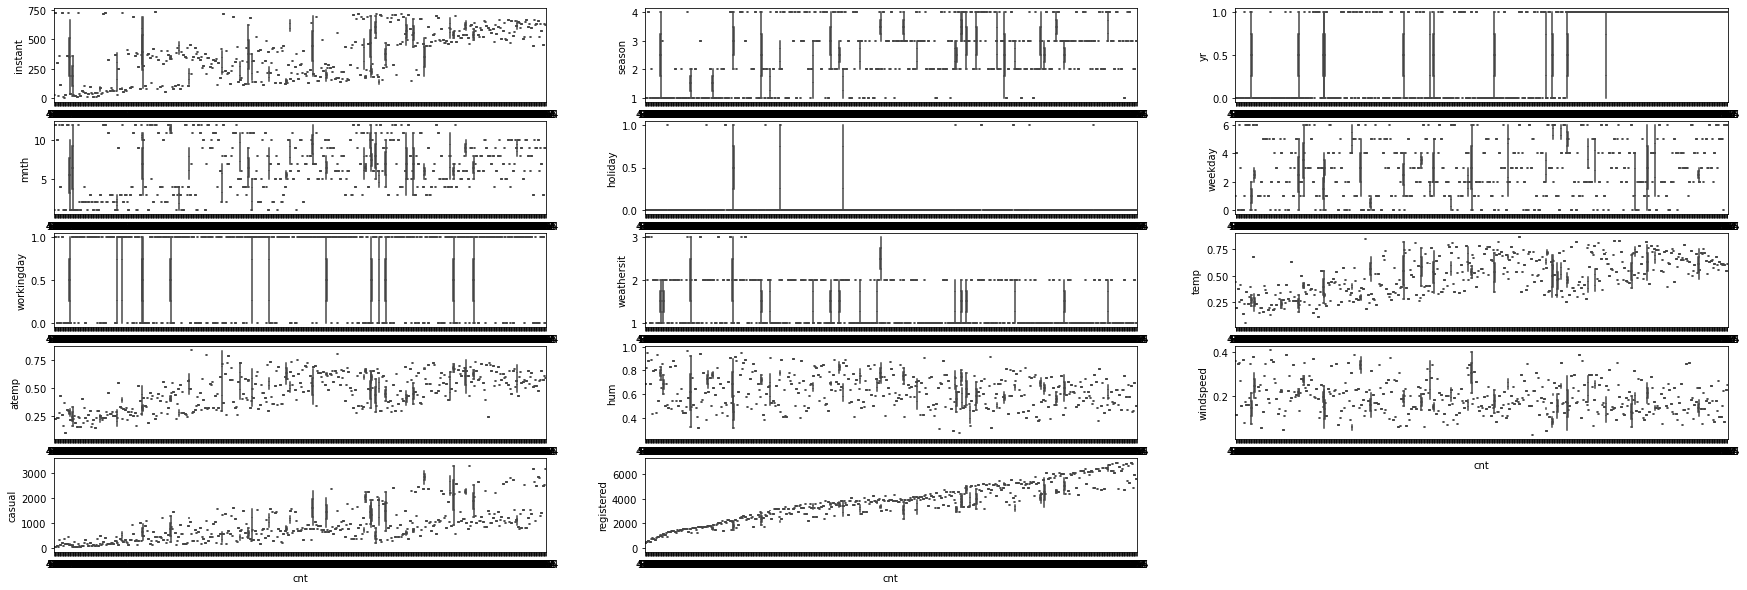

In [20]:
# creating boxplots with respect to target variables :
boxplots_features_target((30,10),'cnt', df_bike_sharing_day_nr_features[0:-1], df_bike_sharing_day)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412555  0.867018  0.497719  0.015318  0.001030   
season      0.412555  1.000000  0.001866  0.828676 -0.012588  0.003497   
yr          0.867018  0.001866  1.000000  0.001385  0.007997 -0.007580   
mnth        0.497719  0.828676  0.001385  1.000000  0.017534  0.015468   
holiday     0.015318 -0.012588  0.007997  0.017534  1.000000 -0.101411   
weekday     0.001030  0.003497 -0.007580  0.015468 -0.101411  1.000000   
workingday -0.004486  0.012267 -0.002031 -0.006631 -0.254031  0.040814   
weathersit -0.019246  0.021752 -0.046891  0.044443 -0.035018  0.030968   
temp        0.149092  0.331178  0.049076  0.215317 -0.029607  0.003649   
atemp       0.151388  0.339493  0.048097  0.222126 -0.033637 -0.003522   
hum        -0.000638  0.185867 -0.120509  0.205785 -0.019840 -0.040761   
windspeed  -0.104608 -0.210036 -0.014040 -0.188130  0.012385 -0.005597   
casual      0.272963  0.203902  0.2505

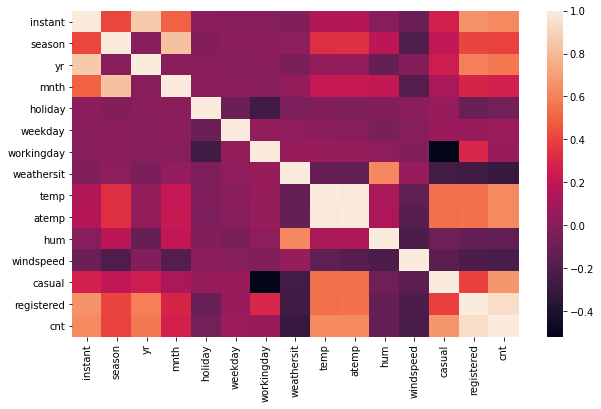

In [21]:
crossCorrelation(df_bike_sharing_day)

#### NOTE:
###### 1.From the correlation plots we understand "cnt" has strong correlation with registered, casual, instant, season, yr, mnth, temp, atemp

###### 2.But upon close inspection collinearity exists between 

#### 3.2.4 Distribution Plots With Respect To Our Target Feature

###### Plotting distribution of our numerical features again to see if removed outliers reduced skewness

/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


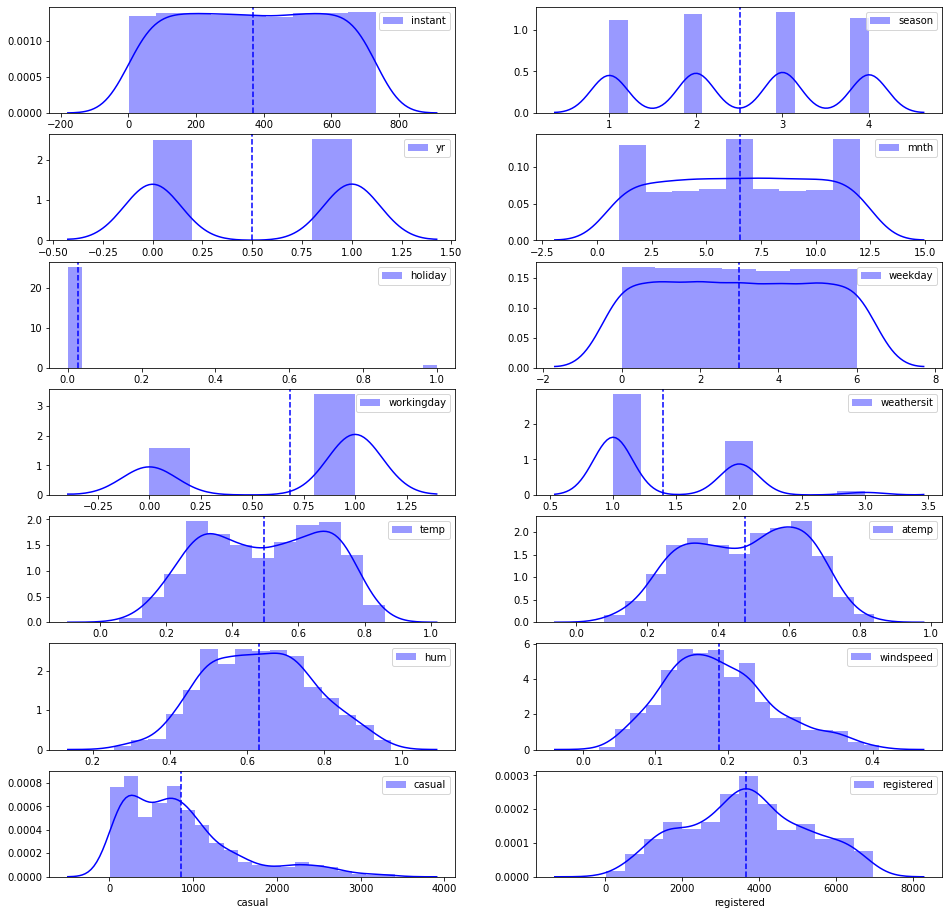

In [22]:
Nr_features = df_bike_sharing_day_nr_features[0:-1]
target_feature = df_bike_sharing_day_nr_features[-1]

def creating_plots(features, targetfeature):
    plt.figure(figsize=(16,16))
    for feature in Nr_features:
        plt.subplot(7,2, Nr_features.index(feature)+1)
        sns.distplot(df_bike_sharing_day[feature], label= feature, color="b")
        plt.axvline(df_bike_sharing_day[feature].mean(), linestyle = '--', color="b")
        plt.legend()
        
creating_plots(Nr_features, target_feature)

#### 3.3 Skewed features

###### Transforming features to avoid bias due to distribution. We are applying logarithmic transformation to reduce the effect of outliers and reduce the range of distribution

### 3.3.1 Skewed Features: Log Transform

In [23]:
df_bike_sharing_day.windspeed= np.log(df_bike_sharing_day.windspeed + 1)

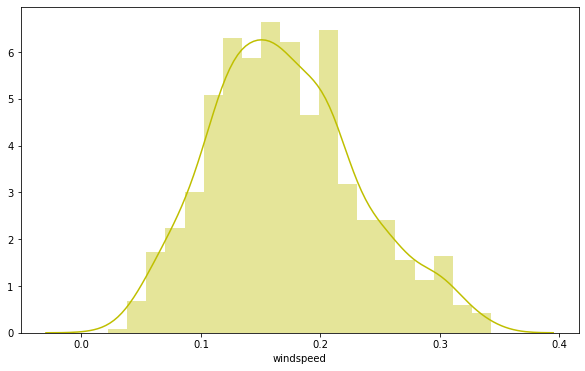

In [24]:
plt.figure(figsize = (10,6))
sns.distplot(df_bike_sharing_day["windspeed"], bins =20, color = "y")

### 3.3.2 Normalization Of Numerical Features

In [25]:
scaler =  MinMaxScaler() #initiating a scaler and applying features to it
df_bike_sharing_day[Nr_features] = scaler.fit_transform(df_bike_sharing_day[Nr_features]) # applying noramlisation to numerical variables

In [26]:
df_bike_sharing_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.000000,2011-01-01,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.767981,0.394719,0.096538,0.091539,985
1,0.001370,2011-01-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.615202,0.622743,0.037852,0.093849,801
2,0.002740,2011-01-03,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.254904,0.622168,0.034624,0.174560,1349
3,0.004110,2011-01-04,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.468123,0.394316,0.031103,0.207046,1562
4,0.005479,2011-01-05,0.0,0.0,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.254464,0.464963,0.023474,0.216286,1600


In [27]:
Nr_features[1:]

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered']

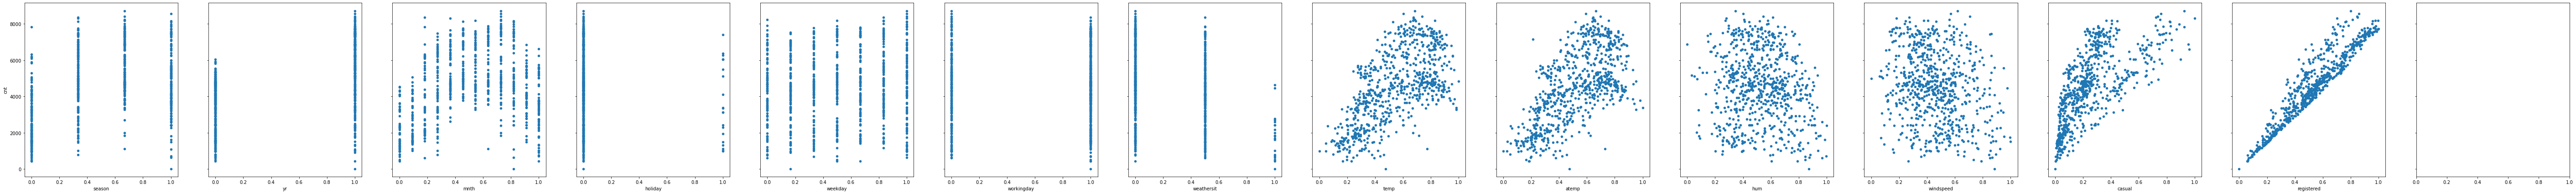

In [28]:
# Visualize and Examine 
#to find out are there any linear relationship between features and response using scatterplots

fig, axs = plt.subplots(1,14, sharey = True) #Controls sharing of properties among x (sharex) or y (sharey)
                                            #1 row and 5 columns
i= 0
for each in Nr_features[1:]:
    df_bike_sharing_day.plot(kind = 'scatter',x = each, y = 'cnt', ax= axs[i],figsize= (100,7))
    i= i+1


#### Observations,
###### The day sharing dataset showcases that count of total bike riders forms a linear trend across {strog positive} : temp, atemp,casual,registered {strong negative} :hum, windspeed 

###### Conditions to check beforeproceeding for linear regression
###### 1. Linear Relationship  between IV and DV
###### 2. Independence of residuals
###### 3. Normality of residuals
###### 4. Equal variance of residuals

In [29]:
import statsmodels.api as sm
x_stats = sm.add_constant(df_bike_sharing_day.drop(['instant','dteday','casual','registered','cnt'],axis = 1))
y_stats = df_bike_sharing_day.cnt

#applying OLS to our X and Y
lm = sm.OLS(y_stats,x_stats).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     257.3
Date:                Sat, 03 Oct 2020   Prob (F-statistic):          2.71e-239
Time:                        11:15:01   Log-Likelihood:                -5916.6
No. Observations:                 723   AIC:                         1.186e+04
Df Residuals:                     711   BIC:                         1.191e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1504.5329    194.629      7.730      0.000    1122.416    1886.649
season      1522.0404    165.013      9.224      0.000    1198.069    1846.012
yr          2030.8359     65.811     30.859      0.000    1901.629    2160.043
mnth        -429.9846    188.443     -2.282      0.023    -799.955     -60.014
holiday     -526.9982    201.416     -2.616      0.009    -922.440    -131.556
weekday      418.7247     98.399      4.255      0.000     225.538     611.912
workingday   111.3152     72.487      1.536      0.125     -30.999     253.629
weathersit -1152.0033    164.788     -6.991      0.000   -1475.532    -828.475
temp        1641.9748   1135.169      1.446      0.148    -586.709    3870.659
atemp       2728.0733   1221.332      2.234      0.026     330.225    5125.921
hum         -867.3100    239.552     -3.621      0.000   -1337.623    -396.997
windspeed   -973.2440    184.638     -5.271      0.000   -1335.744    -610.743
==============================================================================
Omnibus:                       90.547   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.646
Skew:                          -0.732   Prob(JB):                     4.87e-41
Kurtosis:                       5.005   Cond. No.                         98.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Now using VIF to detect multicollinearity
# if VIF =1 not corelated, VIF>5 High corelated, 1<VIF<5 Moderately correlated

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_bike_sharing_day_vif = df_bike_sharing_day.drop(['instant','dteday','casual','registered','cnt'],axis = 1).assign(const = 1)
pd.Series([variance_inflation_factor(df_bike_sharing_day_vif.values, i) for i in range(df_bike_sharing_day_vif.shape[1])],index = df_bike_sharing_day_vif.columns)


season         3.497854
yr             1.025350
mnth           3.289019
holiday        1.083441
weekday        1.023283
workingday     1.076812
weathersit     1.892750
temp          63.798148
atemp         64.864972
hum            2.040929
windspeed      1.185666
const         35.871677
dtype: float64

In [31]:
# Now, getting necessary model parameters( will try for both with and without Log transformation)
X_new = df_bike_sharing_day.drop(['season','atemp','instant','dteday','casual','registered','cnt','hum','windspeed'], axis =1)
Y_new = df_bike_sharing_day.cnt
Y_log_new = np.log(df_bike_sharing_day.cnt+1)

lm_1 = sm.OLS(Y_new, X_new).fit()
# lm_2 = sm.OLS(Y_log_new, X_new).fit()
lm_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              2595.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:15:02   Log-Likelihood:                         -5988.8
No. Observations:                 723   AIC:                                  1.199e+04
Df Residuals:                     716   BIC:                                  1.202e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr          2131.4951     69.396     30.715      0.000    1995.252    2267.738
mnth        1173.2352    112.751     10.406      0.000     951.873    1394.597
holiday     -450.4253    217.175     -2.074      0.038    -876.801     -24.050
weekday      586.2734     99.216      5.909      0.000     391.484     781.063
workingday   248.3713     73.967      3.358      0.001     103.154     393.589
weathersit -1450.9900    130.018    -11.160      0.000   -1706.251   -1195.729
temp        4883.0821    134.784     36.229      0.000    4618.464    5147.701
==============================================================================
Omnibus:                       86.225   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.168
Skew:                          -0.769   Prob(JB):                     1.82e-32
Kurtosis:                       4.576   Cond. No.                         8.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Now we are looking for heteroskedestacity that is pattern displayed by errors as we need a constant variance for our linear model.So we will try to fit  residual plot for our data.

Text(0, 0.5, 'Residuals')

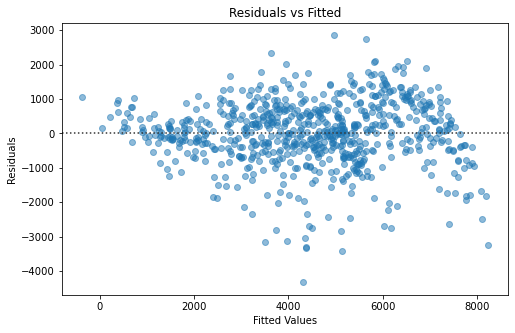

In [32]:
#creating residual plot of cnt vs residuals

plot_lm_cnt_1 = plt.figure(1)
plot_lm_cnt_1.set_figheight(5)
plot_lm_cnt_1.set_figwidth(8)

model_fitted_y_cnt_bikes_day = lm_1.fittedvalues

plot_lm_cnt_1.axes[0] = sns.residplot(model_fitted_y_cnt_bikes_day,'cnt', data = df_bike_sharing_day, scatter_kws = {'alpha':0.5})
plot_lm_cnt_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_cnt_1.axes[0].set_xlabel('Fitted Values')
plot_lm_cnt_1.axes[0].set_ylabel('Residuals')

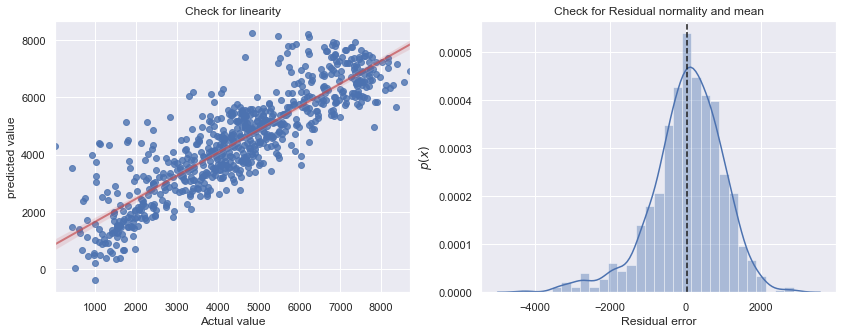

In [33]:
import seaborn as sns; sns.set()
#check for Linearity
f = plt.figure(figsize = (14,5))
ax = f.add_subplot(121)
sns.regplot(x = df_bike_sharing_day.cnt, y = model_fitted_y_cnt_bikes_day, line_kws = {"color":"r","alpha": 0.7,"lw":2})
plt.title('Check for linearity')
plt.xlabel('Actual value')
plt.ylabel('predicted value')

#checkinf for residual normality and mean
ax  = f.add_subplot(122)
sns.distplot((df_bike_sharing_day.cnt- model_fitted_y_cnt_bikes_day),ax=ax,color='b')
plt.axvline((df_bike_sharing_day.cnt - model_fitted_y_cnt_bikes_day).mean(),color = 'k', linestyle ='--')
plt.title("Check for Residual normality and mean")
plt.xlabel('Residual error')
plt.ylabel('$p(x)$');

Text(0, 0.5, 'Standardized Residuals')

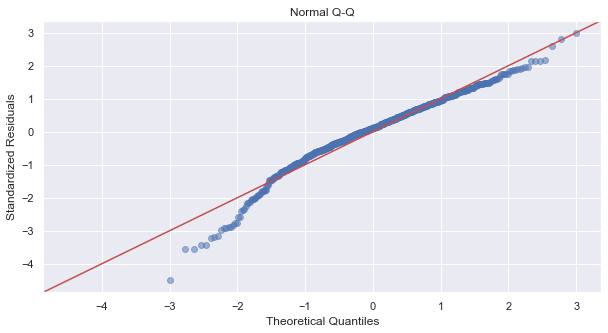

In [34]:

#model_residuals

model_norm_residuals = lm_1.get_influence().resid_studentized_internal

# Detecting Normal Distribution of Residuals - QQ plot
#If residuals do not have a normal distribution then while performing significance test siuch as t test for beta parameter may not perform.

from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm = QQ.qqplot(line = '45', alpha = 0.5, color ='#4C72B0', lw =1) 
plot_lm.set_figheight(5)
plot_lm.set_figwidth(10)

plot_lm.axes[0].set_title('Normal Q-Q')
plot_lm.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm.axes[0].set_ylabel('Standardized Residuals')

# ---4. Model Selection---

#### 4.1 Gradient descent with temperature feature to estimate parameters

The initial cost is: 8738944192.0


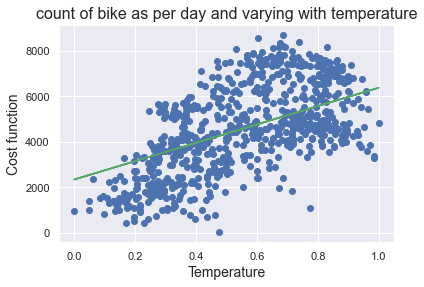

In [35]:
# performing gradient descent  for the temperature feature
x = df_bike_sharing_day.temp
y = df_bike_sharing_day.cnt

# Initial random theta values 
theta = np.zeros(2)

#creating X_day_temp feature matirx, first column = intercept values
X_day_temp = np.ones(shape=(len(x),2)) #numpy.ones(shape, dtype=None, order='C')
X_day_temp[:,1] = x

Y = (df_bike_sharing_day.cnt[:,np.newaxis])

# Cost function

def cost(theta, X_day_temp,y):
    predictions = X_day_temp @ theta
    squared_errors = np.square(predictions - y)
    return np.sum(squared_errors)/(2*len(y))

print('The initial cost is:', cost(theta, X_day_temp, Y))


# Gradient Descent function:
def gradientDescent(X_day_temp, y, theta, alpha, num_iters):
    m = y.size #number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X_day_temp, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X_day_temp.T, y_hat-y)
    return theta

theta = gradientDescent(X_day_temp, Y, 0, 0.008,3000)
gd_predictions = X_day_temp @ theta

#plotting the regression line
plt.scatter(x,y)
plt.plot(x, gd_predictions, 'g')
plt.title("count of bike as per day and varying with temperature",fontsize =16)
plt.xlabel("Temperature", fontsize = 14)
plt.ylabel("Cost function", fontsize = 14)
plt.show()

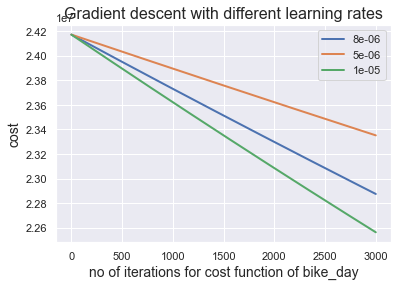

In [36]:
# Define gradient descent function again

def gradientDescent(X_day_temp, y, theta, alpha, num_iters):
    cost_bike_day = np.zeros(num_iters) # create a vector
    m = y.size #number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X_day_temp,theta)
        theta = theta - alpha * (1.0/m) * np.dot(X_day_temp.T,y_hat-y)
        cost_bike_day[i] = cost(theta, X_day_temp, y)
    
    return theta,cost_bike_day


# Gradient Descent with Different Learning Rates

num_iters = 3000
learning_rates = [0.000008, 0.000005, 0.00001]
for lr in learning_rates:
    _, cost_bike_day = gradientDescent(X_day_temp, Y, 0, lr, num_iters)
    plt.plot(cost_bike_day, linewidth = 2)
plt.title("Gradient descent with different learning rates", fontsize = 16)
plt.xlabel("no of iterations for cost function of bike_day", fontsize = 14)
plt.ylabel("cost", fontsize = 14)
plt.legend(list(map(str, learning_rates)))

#### 4.2 Data Preparation: Training And Testing Datasets

In [37]:
#Now, performing multiple linear regression
X = df_bike_sharing_day.drop(['season','atemp','instant','dteday','casual','registered','cnt','hum','windspeed'], axis = 1)
Y = df_bike_sharing_day[['cnt']]

In [38]:
#Now, splitting the data into train/test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state =42)

In [39]:
# Initialize LR model
lr = LinearRegression()

#Fitting the model
lr.fit(X_train, y_train)

#finding intercept (B0)
lr.intercept_

#finding the coefficcient parameter (B1)
lr.coef_

#Make predictions 
predictions_lr = lr.predict(X_test)

#### 4.3 Validating Results

In [41]:
#Now validation of model

r2 = format(r2_score(y_test, predictions_lr),'.3f')
rmse = format(np.sqrt(mean_squared_error(y_test, predictions_lr)), '.3f') #Here we specify 3 digits of precision and f is used to represent floating point number.
mae = format(mean_absolute_error(y_test, predictions_lr),'.3f')
std_lr = format(mean_absolute_error(y_test, predictions_lr),'.3f')


#printing out the result 
print("R squared Score:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R squared Score: 0.752
Root Mean Squared Error: 926.971
Mean Absolute Error: 688.772


In [42]:
result_1 =  pd.DataFrame({'Model':['Multiple'], 'R Squared': [r2], 'RMSE': [rmse], 'MAE':[mae]})
result_1

,Model,R Squared,RMSE,MAE
0,Multiple,0.752,926.971,688.772


#### 4.3 Fitting other models

In [43]:
# Retrieved from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

gcv = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': [80,90,100] ,'n_estimators': [10, 50, 100, 1000]},cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=1)
model_gcv = gcv.fit(X_train,y_train)
gcv_param = model_gcv.best_params_
rfr = RandomForestRegressor(max_depth = gcv_param["max_depth"], n_estimators= gcv_param["n_estimators"],random_state= 1, verbose=False)
cv_neg_mse = cross_val_score(rfr, X_train, y_train, cv=2, n_jobs= 1, scoring='neg_mean_squared_error')
mean_neg_mse = -1.0*np.mean(cv_neg_mse)
Root_mean_neg_mse = np.sqrt(mean_neg_mse)
cv_std = np.std(cv_neg_mse)



/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sreetamkumardev/opt/anaconda3/lib/python3.8/site-packages

In [44]:
rfr = RandomForestRegressor(max_depth = gcv_param["max_depth"], n_estimators= gcv_param["n_estimators"],random_state= 1, verbose=False)
rfr = rfr.fit(X_train,y_train)
predictions_rfr = rfr.predict(X_test)

<ipython-input-44-901144d30ba8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = rfr.fit(X_train,y_train)


In [45]:
# validating resutls via R2, mse and mae. Further, collecting features that were considered important by the model.

R_sq_rfr = r2_score(y_test,predictions_rfr)
Mean_sq_rfr = mean_squared_error(y_test,predictions_rfr)
Mean_abs_rfr = mean_absolute_error(y_test,predictions_rfr)

imp      = rfr.feature_importances_
feat_col = X_train.columns
feat_imp = pd.DataFrame({'feature':feat_col, 'importance':imp })
feat_imp_sorted = feat_imp.sort_values(by='importance', ascending=False)

In [46]:
feat_imp_sorted

,feature,importance
6,temp,0.549296
0,yr,0.268683
1,mnth,0.077228
5,weathersit,0.055550
3,weekday,0.036729
4,workingday,0.008645
2,holiday,0.003869


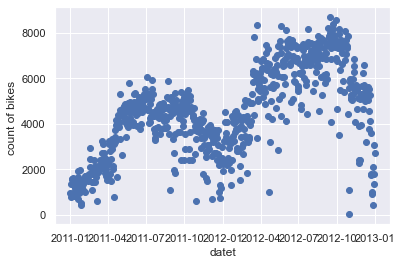

In [47]:
# plotting date time feature with respect to cnt
fig, ax = plt.subplots()
ax.scatter(df_bike_sharing_day.dteday,df_bike_sharing_day.cnt)
ax.set_xlabel('datet')
ax.set_ylabel('count of bikes ')
plt.show()

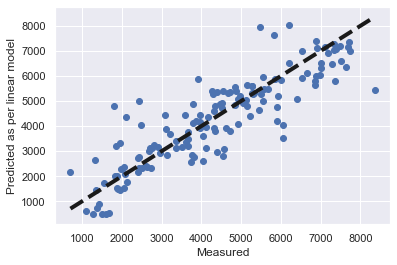

In [48]:
# Retrieved from https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html
# plotting predicted values from linear model with y test
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_lr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted as per linear model')
plt.show()

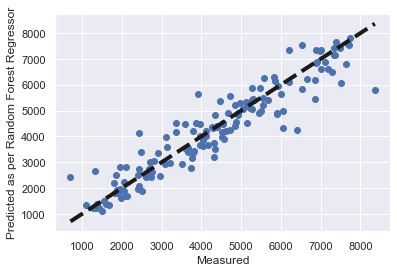

In [49]:
# plotting predicted values from Random Forest Regressor model with y test

fig, ax = plt.subplots()
ax.scatter(y_test, predictions_rfr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted as per Random Forest Regressor')
plt.show()

# ---5.Actionable Recommendation---

###### 1.As per the model temperature influences the most for bike count

###### 2.Month, weather situation of the year closely follow after and influence the bike count.

###### 3.The Rsquare for both feature selected linear model and Random Forest Regressor model perform similar in this case. So, 88.6% variance of  "cnt"(target features)can be explained by the explanatory features: temp,yr, mnth, weathersit,weekday,workingday,holiday